### CASE STUDY II — BIGMART SALES VISUALIZATION (2011)

In [1]:
# STEP 0: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# STEP 1: Read the CSV file
df = pd.read_csv("data/BigMartSalesData.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Amount', 'InvoiceDate', 'Day', 'Month', 'Year', 'CustomerID',
       'Country'],
      dtype='object')

In [6]:
# STEP 2: Convert InvoiceDate & create Year, Month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [7]:
# STEP 3: Create Total Sales column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

QUESTION 1
Plot Total Sales Per Month (Line Plot) – Year 2011 

Which month has lowest sales?

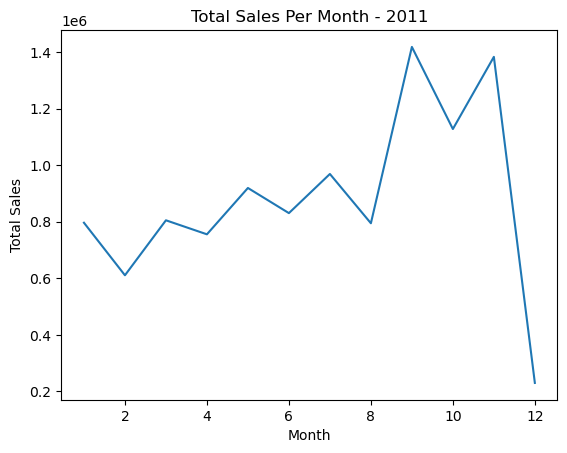

In [8]:
sales_2011 = df[df['Year'] == 2011]

monthly_sales = sales_2011.groupby('Month')['TotalSales'].sum()

plt.figure()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Month - 2011")
plt.show()


In [9]:
monthly_sales.idxmin()


np.int32(12)

In [11]:
# Answer: Month with lowest sales = Month returned by idxmin() i.e 12 

QUESTION 2
Bar Chart – Total Sales Per Month

Is Bar Chart better than Line Plot?

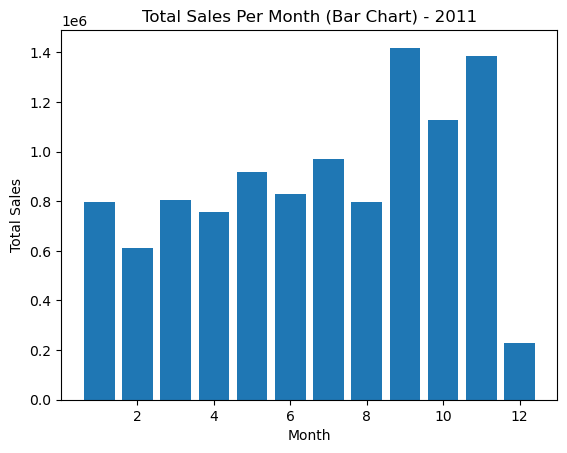

In [12]:
plt.figure()
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Month (Bar Chart) - 2011")
plt.show()


In [13]:
# Yes, bar chart is better for clear month-wise comparison.

QUESTION 3
Pie Chart – Country Wise Sales (2011)

Which country contributes highest?

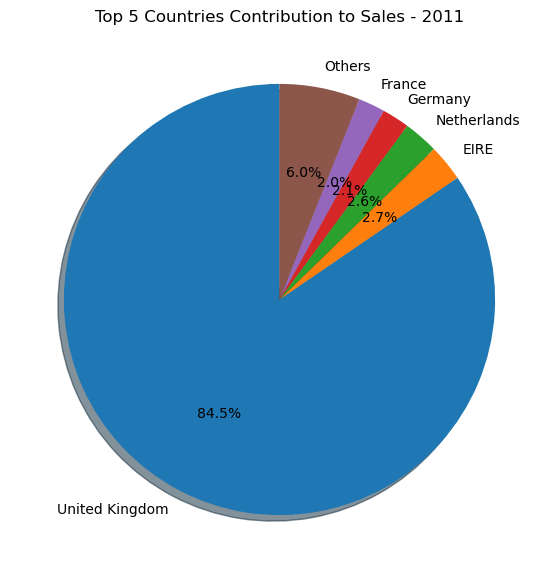

In [16]:
country_sales = sales_2011.groupby('Country')['TotalSales'].sum()

top5 = country_sales.sort_values(ascending=False).head(5)
others = country_sales.sum() - top5.sum()

top5['Others'] = others

plt.figure(figsize=(7,7))
plt.pie(
    top5.values,
    labels=top5.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("Top 5 Countries Contribution to Sales - 2011")
plt.show()



In [19]:
country_sales.idxmax()
# United Kingdom contributes highest towards sales.


'United Kingdom'

QUESTION 4
Scatter Plot – Invoice Amount Concentration

In which range most invoices are concentrated?

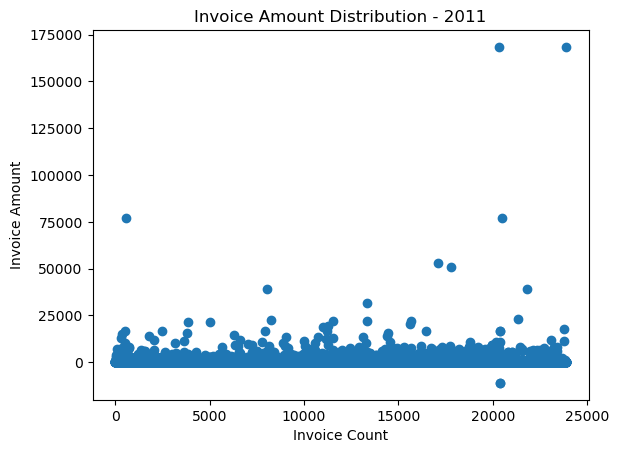

In [20]:
invoice_sales = sales_2011.groupby('InvoiceNo')['TotalSales'].sum()

plt.figure()
plt.scatter(range(len(invoice_sales)), invoice_sales.values)
plt.xlabel("Invoice Count")
plt.ylabel("Invoice Amount")
plt.title("Invoice Amount Distribution - 2011")
plt.show()


In [21]:
# Answer: Most invoice amounts are concentrated in the lower value range (0–1000).

### Enhancement 1: Show values on bar chart

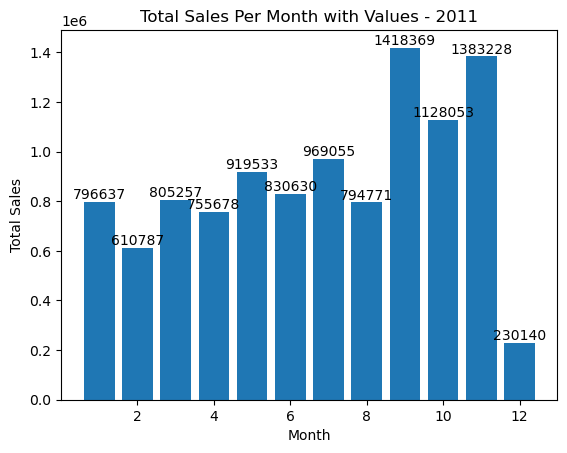

In [22]:
plt.figure()
bars = plt.bar(monthly_sales.index, monthly_sales.values)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center',
             va='bottom')

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Total Sales Per Month with Values - 2011")
plt.show()


### Enhancement 2: Pie chart styling

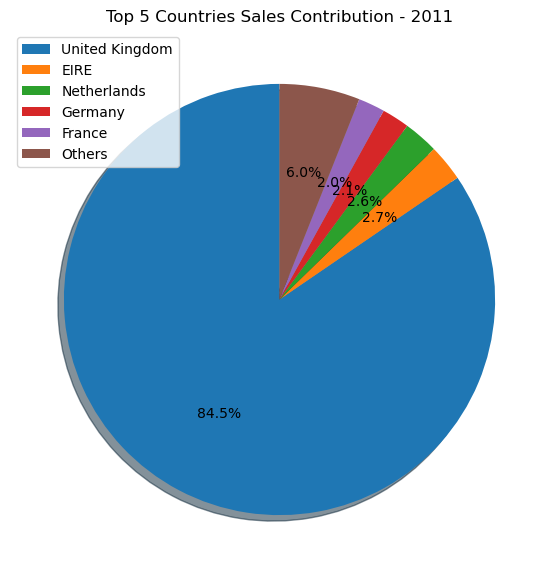

In [25]:
country_sales = sales_2011.groupby('Country')['TotalSales'].sum()

top5 = country_sales.sort_values(ascending=False).head(5)
others = country_sales.sum() - top5.sum()
top5['Others'] = others
plt.figure(figsize=(7,7))
plt.pie(
    top5.values,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
plt.legend(top5.index, loc="best")
plt.title("Top 5 Countries Sales Contribution - 2011")
plt.show()


In [26]:
# For better visualization, only top contributing countries are shown and remaining countries are grouped as Others.

### Enhancement 3: Change scatter color

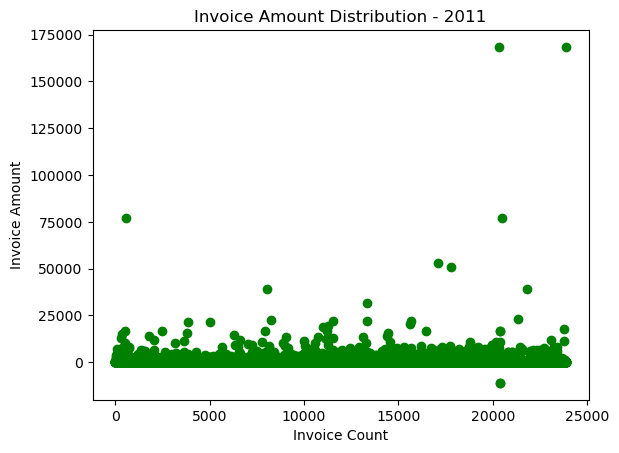

In [27]:
plt.figure()
plt.scatter(range(len(invoice_sales)),
            invoice_sales.values,
            color='green')
plt.xlabel("Invoice Count")
plt.ylabel("Invoice Amount")
plt.title("Invoice Amount Distribution - 2011")
plt.show()
